In [ ]:
import pandas as pd
import numpy as np
import re 
import ast
import json
df = pd.read_csv('ga_sessions_201608.csv', delimiter = ',')

In [ ]:
df.head()

,Unnamed: 0,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,0,NaN,1,1470071491,1470071491,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 10, 'minu...",93247117283883434,NaN,NaN,Social,Not Socially Engaged
1,1,NaN,1,1470107420,1470107420,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 20, 'minu...",8195001505868396741,NaN,NaN,Social,Not Socially Engaged
2,2,NaN,1,1470118714,1470118714,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Eastern...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 23, 'minu...",3715978902848327513,NaN,NaN,Social,Not Socially Engaged
3,3,NaN,1,1470096964,1470096964,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",1932210341172383153,NaN,NaN,Social,Not Socially Engaged
4,4,NaN,1,1470060624,1470060624,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 7, 'minut...",3082948927913895278,NaN,NaN,Social,Not Socially Engaged


In [ ]:
df.shape
#we see that we have 77,446 RECORDS and 17 COLUMNS

(77446, 17)

# Missing Values

In [ ]:
#check for missing values
df.isnull().sum()

Unnamed: 0                  0
visitorId               77446
visitNumber                 0
visitId                     0
visitStartTime              0
date                        0
totals                      0
trafficSource               0
device                      0
geoNetwork                  0
customDimensions            0
hits                        0
fullVisitorId               0
userId                  77446
clientId                77446
channelGrouping             0
socialEngagementType        0
dtype: int64

In [ ]:
#visitorID, userID, and clientID have NO records at all, so we drop them
df.dropna(axis='columns', inplace=True)
df.head()

,Unnamed: 0,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,channelGrouping,socialEngagementType
0,0,1,1470071491,1470071491,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 10, 'minu...",93247117283883434,Social,Not Socially Engaged
1,1,1,1470107420,1470107420,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 20, 'minu...",8195001505868396741,Social,Not Socially Engaged
2,2,1,1470118714,1470118714,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Eastern...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 23, 'minu...",3715978902848327513,Social,Not Socially Engaged
3,3,1,1470096964,1470096964,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",1932210341172383153,Social,Not Socially Engaged
4,4,1,1470060624,1470060624,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 7, 'minut...",3082948927913895278,Social,Not Socially Engaged


In [ ]:
#drop unnecessary columns that contribute nothing to the dataset
clean_df = df.iloc[:, 4:]
clean_df.drop(columns=['customDimensions', 'fullVisitorId'], inplace=True)
clean_df.head()

,date,totals,trafficSource,device,geoNetwork,hits,channelGrouping,socialEngagementType
0,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'hitNumber': 1, 'time': 0, 'hour': 10, 'minu...",Social,Not Socially Engaged
1,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...","[{'hitNumber': 1, 'time': 0, 'hour': 20, 'minu...",Social,Not Socially Engaged
2,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Eastern...","[{'hitNumber': 1, 'time': 0, 'hour': 23, 'minu...",Social,Not Socially Engaged
3,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",Social,Not Socially Engaged
4,20160801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...","[{'hitNumber': 1, 'time': 0, 'hour': 7, 'minut...",Social,Not Socially Engaged


In [ ]:
clean_df.shape
#we now have 77,446 records and 8 columns left BEFORE unpacking

(77446, 8)

# Parse Columns

In [ ]:
#unpack data from totals column
test = pd.DataFrame(clean_df.totals.str.split(',').tolist())
test.columns = ['visits', 'hits', 'pageviews', 'timeOnSite', 'bounces', 'transactions', 'transactionRevenue', 'newVisits', 'screenviews', 'uniqueScreenviews', 'timeOnScreen', 'totalTransactionRevenue', 'sessionQualityDim']
#drop these columns because they contain literally nothing
test.drop(columns=['screenviews','uniqueScreenviews','timeOnScreen','sessionQualityDim'], inplace=True)
test.head()

,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue
0,{'visits': 1,'hits': 1,'pageviews': 1,'timeOnSite': None,'bounces': 1,'transactions': None,'transactionRevenue': None,'newVisits': 1,'totalTransactionRevenue': None
1,{'visits': 1,'hits': 1,'pageviews': 1,'timeOnSite': None,'bounces': 1,'transactions': None,'transactionRevenue': None,'newVisits': 1,'totalTransactionRevenue': None
2,{'visits': 1,'hits': 1,'pageviews': 1,'timeOnSite': None,'bounces': 1,'transactions': None,'transactionRevenue': None,'newVisits': 1,'totalTransactionRevenue': None
3,{'visits': 1,'hits': 1,'pageviews': 1,'timeOnSite': None,'bounces': 1,'transactions': None,'transactionRevenue': None,'newVisits': 1,'totalTransactionRevenue': None
4,{'visits': 1,'hits': 1,'pageviews': 1,'timeOnSite': None,'bounces': 1,'transactions': None,'transactionRevenue': None,'newVisits': 1,'totalTransactionRevenue': None


In [ ]:
#split data for each new totals subcolumn
for column in test.columns:
    test[column] = test[column].str.split(': ', expand=True)[1] #[1] stands for the 2nd part of the split data; show only [1]
test.head()

,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue
0,1,1,1,None,1,None,None,1,None
1,1,1,1,None,1,None,None,1,None
2,1,1,1,None,1,None,None,1,None
3,1,1,1,None,1,None,None,1,None
4,1,1,1,None,1,None,None,1,None


In [ ]:
#add columns to clean_df and drop original totals column
clean_df.drop(columns=['totals'], inplace=True)
for column in test.columns:
    clean_df[column] = test[column]
clean_df.head()

,date,trafficSource,device,geoNetwork,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue
0,20160801,"{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None
1,20160801,"{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None
2,20160801,"{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Eastern...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None
3,20160801,"{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None
4,20160801,"{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None


In [ ]:
#unpack, split, add, and drop for the traffic column
test = pd.DataFrame(clean_df.trafficSource.str.split(',').tolist())
test.columns = ['referralPath', 'campaign', 'source', 'medium', 'keyword', 'adContent', 'campaignId', 'adGroupId', 'creativeId', 'criteriaId', 'page', 'slot', 'criteriaParameters', 'gclId', 'customerId', 'adNetworkType', 'targetingCriteria', 'isVideoAd', 'isTrueDirect', 'campaignCode', 'none1', 'none2']
#drop these columns because they contain literally nothing or "not available in demo dataset"
test.drop(columns=['referralPath','campaign','campaignId','adContent','adGroupId','creativeId', 'criteriaId', 'page', 'slot','gclId', 'customerId','criteriaParameters','adNetworkType', 'targetingCriteria', 'isVideoAd', 'isTrueDirect', 'campaignCode','none1', 'none2'], inplace=True)

for column in test.columns:
    test[column] = test[column].str.split(': ', expand=True)[1]

clean_df.drop(columns=['trafficSource'], inplace=True)
for column in test.columns:
    clean_df[column] = test[column]
clean_df.head()

,date,device,geoNetwork,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword
0,20160801,"{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None
1,20160801,"{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None
2,20160801,"{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Eastern...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None
3,20160801,"{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None
4,20160801,"{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None


In [ ]:
#unpack, split, add, and drop for the device column
test = pd.DataFrame(clean_df.device.str.split(',').tolist())
test.columns = ['browser', 'browserVersion', 'browserSize', 'operatingSystem', 'operatingSystemVersion', 'isMobile', 'mobileDeviceBranding', 'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 'javaEnabled', 'language', 'screenColors', 'screenResolution', 'deviceCategory']
#drop these columns because they contain not available in demo dataset
test.drop(columns=['browserVersion', 'browserSize','operatingSystemVersion','isMobile','mobileDeviceBranding', 'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 'javaEnabled', 'language', 'screenColors', 'screenResolution'], inplace=True)

for column in test.columns:
    test[column] = test[column].str.split(': ', expand=True)[1]

clean_df.drop(columns=['device'], inplace=True)
for column in test.columns:
    clean_df[column] = test[column]
clean_df.head()

,date,geoNetwork,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword,browser,operatingSystem,deviceCategory
0,20160801,"{'continent': 'Europe', 'subContinent': 'North...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'}
1,20160801,"{'continent': 'Asia', 'subContinent': 'Southea...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'}
2,20160801,"{'continent': 'Asia', 'subContinent': 'Eastern...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'}
3,20160801,"{'continent': 'Asia', 'subContinent': 'Souther...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'}
4,20160801,"{'continent': 'Asia', 'subContinent': 'Southea...",1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'}


In [ ]:
#unpack, split, add, and drop for the geoNetwork column
test = pd.DataFrame(clean_df.geoNetwork.str.split(',').tolist())
test.columns = ['continent', 'subContinent', 'country', 'region', 'metro', 'city', 'cityId', 'networkDomain', 'latitude', 'longitude', 'networkLocation']
#drop these columns because they contain not available in demo dataset
test.drop(columns=['continent', 'subContinent', 'region', 'metro', 'city', 'cityId', 'networkDomain', 'latitude', 'longitude', 'networkLocation'], inplace=True)

for column in test.columns:
    test[column] = test[column].str.split(': ', expand=True)[1]

clean_df.drop(columns=['geoNetwork'], inplace=True)
for column in test.columns:
    clean_df[column] = test[column]
clean_df.head()

,date,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,20160801,1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,20160801,1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,20160801,1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,20160801,1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,20160801,1,Social,Not Socially Engaged,1,1,None,1,None,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


In [ ]:
clean_df.shape
#we still have 77446 records and 19 columns left after parsing and dropping

(77446, 19)

# Dummies

In [ ]:
#replace 'None' with 0 respectively
clean_df['timeOnSite'].replace('None', 0, inplace=True)
clean_df.head()

,date,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,20160801,1,Social,Not Socially Engaged,1,1,0,1,None,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,20160801,1,Social,Not Socially Engaged,1,1,0,1,None,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,20160801,1,Social,Not Socially Engaged,1,1,0,1,None,None,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,20160801,1,Social,Not Socially Engaged,1,1,0,1,None,None,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,20160801,1,Social,Not Socially Engaged,1,1,0,1,None,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


In [ ]:
clean_df['transactions'].replace('None', 0, inplace=True)
clean_df.head()

,date,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,None,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,None,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,None,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


In [ ]:
clean_df['transactionRevenue'].replace('None', 0, inplace=True)
clean_df.head()

,date,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


In [ ]:
clean_df['pageviews'].replace('None', 0, inplace=True)
clean_df.head()

,date,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


In [ ]:
clean_df['bounces'].replace('None', 0, inplace=True)
clean_df.head()

,date,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,None,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


In [ ]:
clean_df['totalTransactionRevenue'].replace('None', 0, inplace=True)
clean_df.head()

,date,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


In [ ]:
clean_df['newVisits'].replace('None', 0, inplace=True)
clean_df.head()

,date,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


In [ ]:
#convert strings to ints
clean_df['hits'] = pd.to_numeric(clean_df['hits'])
clean_df['visits'] = pd.to_numeric(clean_df['visits'])
clean_df['pageviews'] = pd.to_numeric(clean_df['pageviews'])
clean_df['timeOnSite'] = pd.to_numeric(clean_df['timeOnSite'])
clean_df['bounces'] = pd.to_numeric(clean_df['bounces'])
clean_df['transactions'] = pd.to_numeric(clean_df['transactions'])
clean_df['transactionRevenue'] = pd.to_numeric(clean_df['transactionRevenue'])
clean_df['newVisits'] = pd.to_numeric(clean_df['newVisits'])
clean_df['totalTransactionRevenue'] = pd.to_numeric(clean_df['totalTransactionRevenue'])

clean_df.head()

,date,hits,channelGrouping,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,20160801,1,Social,Not Socially Engaged,1,1,0,1,0,0,1,0,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


In [ ]:
#divide revenue and total revenue by 1000000
clean_df['transactionRevenue'] = clean_df['transactionRevenue'].div(1000000)
clean_df['totalTransactionRevenue'] = clean_df['totalTransactionRevenue'].div(1000000)
clean_df.describe()

,date,hits,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue
count,7.744600e+04,77446.000000,77446.0,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000
mean,2.016082e+07,6.148878,1.0,4.845957,148.577047,0.488870,0.016579,2.072656,0.779924,2.531268
std,1.785817e+01,14.273928,0.0,10.131518,414.374027,0.499879,0.142323,36.338078,0.414300,58.349296
min,2.016080e+07,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.016081e+07,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.016082e+07,2.000000,1.0,2.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.016082e+07,5.000000,1.0,5.000000,101.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,2.016090e+07,500.000000,1.0,469.000000,15020.000000,1.000000,6.000000,4085.500000,1.000000,9227.740000


In [ ]:
clean_df.to_excel('clean_data_parsed_only.xlsx')

In [ ]:
#turn categoricals into dummies
dumclean_df = pd.get_dummies(clean_df, columns=['channelGrouping', 'medium', 'operatingSystem','browser','deviceCategory','country','source','keyword'])
dumclean_df.head()

,date,hits,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,...,keyword_'youtube merchandisr',keyword_'youtube shirt',keyword_'youtube shop',keyword_'youtube store',keyword_'youtube t shirt',keyword_'youtuber water bottle',keyword_'youtubeshop',keyword_'谷歌store',keyword_'谷歌纪念品商店',keyword_None
0,20160801,1,Not Socially Engaged,1,1,0,1,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
1,20160801,1,Not Socially Engaged,1,1,0,1,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2,20160801,1,Not Socially Engaged,1,1,0,1,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,20160801,1,Not Socially Engaged,1,1,0,1,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
4,20160801,1,Not Socially Engaged,1,1,0,1,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#binarize certain columns
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
dumclean_df['socialEngagementType'] = enc.fit_transform(clean_df.socialEngagementType)[:,0]
dumclean_df.head()

,date,hits,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,...,keyword_'youtube merchandisr',keyword_'youtube shirt',keyword_'youtube shop',keyword_'youtube store',keyword_'youtube t shirt',keyword_'youtuber water bottle',keyword_'youtubeshop',keyword_'谷歌store',keyword_'谷歌纪念品商店',keyword_None
0,20160801,1,0,1,1,0,1,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
1,20160801,1,0,1,1,0,1,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2,20160801,1,0,1,1,0,1,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,20160801,1,0,1,1,0,1,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
4,20160801,1,0,1,1,0,1,0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dumclean_df.to_excel('clean_data_dummies_included.xlsx')

In [ ]:
#purely numerical and dummied data; date is already exported above for visualization purposes
numclean_df = dumclean_df.drop(columns=['date'])
numclean_df.head()
#we now have 644 columns after parsing, dropping, and creating dummies

,hits,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,...,keyword_'youtube merchandisr',keyword_'youtube shirt',keyword_'youtube shop',keyword_'youtube store',keyword_'youtube t shirt',keyword_'youtuber water bottle',keyword_'youtubeshop',keyword_'谷歌store',keyword_'谷歌纪念品商店',keyword_None
0,1,0,1,1,0,1,0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,1,0,1,0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,1,0,1,0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,1,0,1,0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,1,0,1,0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Descriptive data
numclean_df.describe()

,hits,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,...,keyword_'youtube merchandisr',keyword_'youtube shirt',keyword_'youtube shop',keyword_'youtube store',keyword_'youtube t shirt',keyword_'youtuber water bottle',keyword_'youtubeshop',keyword_'谷歌store',keyword_'谷歌纪念品商店',keyword_None
count,77446.000000,77446.0,77446.0,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,...,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000
mean,6.148878,0.0,1.0,4.845957,148.577047,0.488870,0.016579,2.072656,0.779924,2.531268,...,0.000013,0.000026,0.000052,0.000077,0.000039,0.000013,0.000013,0.000065,0.000013,0.661364
std,14.273928,0.0,0.0,10.131518,414.374027,0.499879,0.142323,36.338078,0.414300,58.349296,...,0.003593,0.005082,0.007187,0.008802,0.006224,0.003593,0.003593,0.008035,0.003593,0.473249
min,1.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.0,1.0,2.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,0.0,1.0,5.000000,101.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,500.000000,0.0,1.0,469.000000,15020.000000,1.000000,6.000000,4085.500000,1.000000,9227.740000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Correlation Matrix

# Clusters

In [ ]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
scaler.fit(numclean_df)
numclean_df_scaled = scaler.transform(numclean_df)
numclean_df_scaled

array([[-0.36072139,  0.        ,  0.        , ..., -0.00803525,
        -0.00359338,  0.71556031],
       [-0.36072139,  0.        ,  0.        , ..., -0.00803525,
        -0.00359338,  0.71556031],
       [-0.36072139,  0.        ,  0.        , ..., -0.00803525,
        -0.00359338,  0.71556031],
       ...,
       [-0.01043013,  0.        ,  0.        , ..., -0.00803525,
        -0.00359338, -1.39750625],
       [-0.01043013,  0.        ,  0.        , ..., -0.00803525,
        -0.00359338,  0.71556031],
       [-0.01043013,  0.        ,  0.        , ..., -0.00803525,
        -0.00359338, -1.39750625]])

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

performance_map = {} #for inertia/elbow
performance_silhouette = {} #for silhouette

#elbow and silhouette method
for k in range(1, 9): 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(numclean_df_scaled)
    
    #record inertia
    performance_map[k] = kmeans.inertia_
    
    #record silhouette scores
    if k > 1:
        performance_silhouette[k] = silhouette_score(numclean_df_scaled, kmeans.labels_)
print(performance_map)

{1: 49720332.00000007, 2: 49553362.379295245, 3: 49071114.61410379, 4: 48759966.86783614, 5: 48943477.6950295, 6: 48260837.19848931, 7: 48641888.160217665, 8: 48407821.76859273}


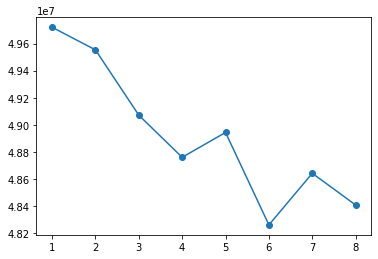

In [ ]:
#elbow chart
%matplotlib inline
import matplotlib.pyplot as plt 

plt.scatter(performance_map.keys(),performance_map.values())
plt.plot(list(performance_map.keys()), list(performance_map.values()))
plt.show()
#Elbow at 4-5

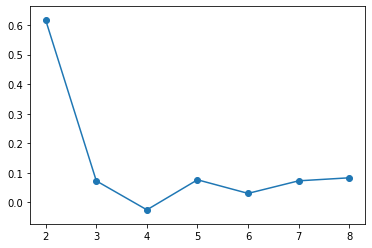

In [ ]:
#silhouette chart
plt.scatter(performance_silhouette.keys(), performance_silhouette.values())
plt.plot(list(performance_silhouette.keys()), list(performance_silhouette.values()))
plt.show()
#first highest point is 2, second is 5

In [ ]:
#5 is the best size
kmeans = KMeans(n_clusters=5, random_state=0).fit(numclean_df_scaled)
kmeans.labels_ #check if worked

array([3, 3, 3, ..., 2, 3, 2])

In [ ]:
#export to excel for heat map
dumclean_df["label"] = kmeans.labels_
dumclean_df.to_excel("m2_clustering.xlsx")

In [ ]:
cluster_means = dumclean_df.groupby(['label']).mean()
cluster_means.to_excel("cluster_means.xlsx")
cluster_means

,date,hits,socialEngagementType,visits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,...,keyword_'youtube merchandisr',keyword_'youtube shirt',keyword_'youtube shop',keyword_'youtube store',keyword_'youtube t shirt',keyword_'youtuber water bottle',keyword_'youtubeshop',keyword_'谷歌store',keyword_'谷歌纪念品商店',keyword_None
label,,,,,,,,,,,,,,,,,,,,,
0,2.016082e+07,2.146552,0,1.0,1.862069,37.599138,0.728448,0.000000,0.000000,0.926724,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875000
1,2.016082e+07,1.385366,0,1.0,1.317073,12.419512,0.829268,0.000000,0.000000,0.917073,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.970732
2,2.016082e+07,7.637527,0,1.0,5.994678,190.422527,0.393349,0.016117,1.700192,0.757785,...,0.000038,0.000075,0.000151,0.000226,0.000113,0.000038,0.000038,0.000189,0.000038,0.012834
3,2.016082e+07,5.405959,0,1.0,4.271602,127.696031,0.536474,0.016965,2.285969,0.790300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999268
4,2.016082e+07,1.000000,0,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Revenue Prediction

# Revenue Classification

In [ ]:
#drop date for irrelevancy, drop visits, TransactionRevenues and totalTransactionRevenue for multicollinearity, and make Keyword our dependant variable
catclean_df = clean_df.drop(columns=['date', 'visits', 'transactionRevenue', 'totalTransactionRevenue'])
catclean_df.head()

,hits,channelGrouping,socialEngagementType,pageviews,timeOnSite,bounces,transactions,newVisits,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,1,Social,Not Socially Engaged,1,0,1,0,1,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,1,Social,Not Socially Engaged,1,0,1,0,1,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,1,Social,Not Socially Engaged,1,0,1,0,1,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,1,Social,Not Socially Engaged,1,0,1,0,1,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,1,Social,Not Socially Engaged,1,0,1,0,1,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


In [ ]:
#check to see the 4 quartiles of our data in order to create bins for numerical data
catclean_df.describe()

,hits,pageviews,timeOnSite,bounces,transactions,newVisits
count,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000,77446.000000
mean,6.148878,4.845957,148.577047,0.488870,0.016579,0.779924
std,14.273928,10.131518,414.374027,0.499879,0.142323,0.414300
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,2.000000,5.000000,0.000000,0.000000,1.000000
75%,5.000000,5.000000,101.000000,1.000000,0.000000,1.000000
max,500.000000,469.000000,15020.000000,1.000000,6.000000,1.000000


In [ ]:
#bin numerical categories by median
bintest = pd.cut(catclean_df.hits, bins=[0,2,500], labels=['low','high'])
catclean_df.hits = bintest
bintest = pd.cut(catclean_df.pageviews, bins=[0,2,469], labels=['low','high'])
catclean_df.pageviews = bintest
bintest = pd.cut(catclean_df.timeOnSite, bins=[-1,5,15020], labels=['low','high'])
catclean_df.timeOnSite = bintest
bintest = pd.cut(catclean_df.bounces, bins=[-1,0,1], labels=['no','yes'])
catclean_df.bounces = bintest
bintest = pd.cut(catclean_df.transactions, bins=[-1,0,6], labels=['no','yes'])
catclean_df.transactions = bintest
bintest = pd.cut(catclean_df.newVisits, bins=[-1,0,1], labels=['no','yes'])
catclean_df.newVisits = bintest

catclean_df.head()

,hits,channelGrouping,socialEngagementType,pageviews,timeOnSite,bounces,transactions,newVisits,source,medium,keyword,browser,operatingSystem,deviceCategory,country
0,low,Social,Not Socially Engaged,low,low,yes,no,yes,'youtube.com','referral',None,'Chrome','Windows','desktop'},'United Kingdom'
1,low,Social,Not Socially Engaged,low,low,yes,no,yes,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Philippines'
2,low,Social,Not Socially Engaged,low,low,yes,no,yes,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Mongolia'
3,low,Social,Not Socially Engaged,low,low,yes,no,yes,'youtube.com','referral',None,'Safari','Macintosh','desktop'},'Pakistan'
4,low,Social,Not Socially Engaged,low,low,yes,no,yes,'youtube.com','referral',None,'Chrome','Windows','desktop'},'Malaysia'


However, all classification methods require data to be numerical, so we will convert back to numerical, with dummies, in order to complete the next two tasks.

In [ ]:
classclean_df = clean_df.drop(columns=['date', 'visits', 'transactionRevenue', 'totalTransactionRevenue'])
classclean_df = pd.get_dummies(classclean_df, columns=['socialEngagementType','channelGrouping', 'medium', 'operatingSystem','browser','deviceCategory','country','source','keyword'])

bintest2 = pd.cut(classclean_df.transactions, bins=[-1,0,6], labels=False)
classclean_df.transactions = bintest2

classclean_df.head()

,hits,pageviews,timeOnSite,bounces,transactions,newVisits,socialEngagementType_Not Socially Engaged,channelGrouping_(Other),channelGrouping_Affiliates,channelGrouping_Direct,...,keyword_'youtube merchandisr',keyword_'youtube shirt',keyword_'youtube shop',keyword_'youtube store',keyword_'youtube t shirt',keyword_'youtuber water bottle',keyword_'youtubeshop',keyword_'谷歌store',keyword_'谷歌纪念品商店',keyword_None
0,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x = classclean_df.drop('transactions', axis=1) #independant variables
y = classclean_df['transactions'] #dependant variable

In [ ]:
from sklearn import tree
from pandas_ml import ConfusionMatrix
from sklearn.model_selection import cross_val_predict

clf = tree.DecisionTreeClassifier()
y_pred = cross_val_predict(clf, x, y,cv=5)
cm = ConfusionMatrix(y, y_pred)
print(cm)
cm.print_stats() 
#accuracy of 97.8%, f1-score of 32.45%

Predicted  False  True  __all__
Actual                         
False      75340   918    76258
True         792   396     1188
__all__    76132  1314    77446
population: 77446
P: 1188
N: 76258
PositiveTest: 1314
NegativeTest: 76132
TP: 396
TN: 75340
FP: 918
FN: 792
TPR: 0.3333333333333333
TNR: 0.9879619187495082
PPV: 0.3013698630136986
NPV: 0.989597015709557
FPR: 0.012038081250491751
FDR: 0.6986301369863014
FNR: 0.6666666666666666
ACC: 0.9779200991658704
F1_score: 0.31654676258992803
MCC: 0.3057552561234983
informedness: 0.3212952520828416
markedness: 0.29096687872325555
prevalence: 0.015339720579500555
LRP: 27.689905591866374
LRN: 0.6747898416069374
DOR: 41.03485838779956
FOR: 0.010402984290442915


In [ ]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression(random_state=2, solver='liblinear')
y_pred = cross_val_predict(clr, x, y, cv=5)
cm = ConfusionMatrix(y, y_pred)
print(cm)
cm.print_stats()
#accuracy of 98.4%, f-1 score of 23.97%

Predicted  False  True  __all__
Actual                         
False      76088   170    76258
True        1003   185     1188
__all__    77091   355    77446
population: 77446
P: 1188
N: 76258
PositiveTest: 355
NegativeTest: 77091
TP: 185
TN: 76088
FP: 170
FN: 1003
TPR: 0.15572390572390574
TNR: 0.9977707256943534
PPV: 0.5211267605633803
NPV: 0.986989402135139
FPR: 0.0022292743056466207
FDR: 0.4788732394366197
FNR: 0.8442760942760943
ACC: 0.9848539627611497
F1_score: 0.23979261179520414
MCC: 0.2792724531905526
informedness: 0.15349463141825925
markedness: 0.5081161626985193
prevalence: 0.015339720579500555
LRP: 69.85408001584473
LRN: 0.8461624224228051
DOR: 82.553985103513
FOR: 0.013010597864861008
